## Импорты и зависимости

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [ ]:
! pip install pytz
! pip install tzwhere

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tzwhere: filename=tzwhere-3.0.3-py3-none-any.whl size=23742580 sha256=493cf69b251fcdb2ae20d5a5ceaf24beaafc750ee5db1fa4bf8b2ea46def5555
  Stored in directory: /root/.cache/pip/wheels/fc/41/05/71acea338ac02030bc7d7cae140be7b033faaafab96a6dfdc2
Successfully built tzwhere


In [1]:
! wget https://github.com/pensnarik/russian-cities/raw/master/russian-cities.json -O 'russian-cities.json'

--2023-11-03 17:09:20--  https://github.com/pensnarik/russian-cities/raw/master/russian-cities.json
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pensnarik/russian-cities/master/russian-cities.json [following]
--2023-11-03 17:09:20--  https://raw.githubusercontent.com/pensnarik/russian-cities/master/russian-cities.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 259835 (254K) [text/plain]
Saving to: ‘russian-cities.json’

russian-cities.json 100%[===================>] 253.75K  --.-KB/s    in 0.03s   

2023-11-03 17:09:20 (9.80 MB/s) - ‘russian-cities.json’ saved [259835/259835]



In [ ]:
import datetime
import functools
import json
import pytz

from tzwhere import tzwhere

with open('russian-cities.json', 'r') as f:
    rus_cities = json.load(f)

tz = tzwhere.tzwhere()

@functools.lru_cache
def coords_to_uts_offset(lat, lon):
    tz_en_name = tz.tzNameAt(float(lat), float(lon))
    tz_en_name = tz_en_name if tz_en_name else 'Europe/Moscow'
    utc_offset = datetime.datetime.now(
        pytz.timezone(tz_en_name)
    ).utcoffset().total_seconds()/60/60

    return int(utc_offset)

/usr/local/lib/python3.10/dist-packages/tzwhere/tzwhere.py:62: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.timezoneNamesToPolygons[tzname] = WRAP(polys)


In [ ]:
rus_city_time_delta = {
    data['name']: coords_to_uts_offset(
        data['coords']['lat'], data['coords']['lon']
    ) for data in rus_cities
}
def get_city_time_rus_delta(city_name):
    if not city_name in rus_city_time_delta.keys():
        return 0
    return rus_city_time_delta[city_name] - 3

In [ ]:
conn = sqlite3.connect('test_database')

In [ ]:
exel_cc_logs_name = "1 Логи КЦ.xlsx"
exel_forms_name = "2 Анкеты.xlsx"

In [ ]:
df_cc_logs = pd.read_excel(exel_cc_logs_name)
df_forms = pd.read_excel(exel_forms_name)

In [ ]:
df_cc_logs.head()

,START_TIME,Дата окон_звонка,RECIVED,FINISHED,EXPIRATION_TIME,APPID,PRD,COMM,RESULT,Дата,Неделя,Месяц,Год
0,2019-03-12 09:11:58,2019-03-12 09:29:41,2019-03-11 23:54:27,2019-03-12 09:29:42,2019-03-12 09:51:58,FICCBI20190311036583,CCBI,Заказана в ДО,Обратится в Отделение,2019-03-11,11,3,2019
1,2019-03-12 05:34:04,2019-03-12 05:34:15,2019-03-11 23:53:07,2019-03-12 10:04:44,2019-03-12 06:14:04,FICCBI20190311036573,CCBI,чп,NaN,2019-03-11,11,3,2019
2,2019-03-12 09:41:51,2019-03-12 10:04:44,2019-03-11 23:53:07,2019-03-12 10:04:44,2019-03-12 10:21:51,FICCBI20190311036573,CCBI,NaN,Анкета дозаполнена. Заявка на доставку заведена,2019-03-11,11,3,2019
3,2019-03-12 04:42:18,2019-03-12 04:43:27,2019-03-11 23:52:48,2019-03-12 09:55:31,2019-03-12 05:22:18,F0TDRC20S19031117458,CCBI,чп,NaN,2019-03-11,11,3,2019
4,2019-03-12 09:47:54,2019-03-12 09:55:31,2019-03-11 23:52:48,2019-03-12 09:55:31,2019-03-12 10:27:54,F0TDRC20S19031117458,CCBI,NaN,Анкета дозаполнена. Заявка заведена,2019-03-11,11,3,2019


In [ ]:
df_forms.head()

,Id заявка,flecs_CREATEDATETIME,Скоринг М,Скоринг R,Тип доставки,Дата заключения договора,Договор заключен?,Город,Дата назначеной встречи,sf_channel,flecs_last_APPID,Запрашиваем сумма
0,FICCBI20190320018760,2019-03-20 13:51:00.3280000,0,0,NaN,NaN,NaN,Волгоград,NaN,03. Партнерки,F0TDRC20S19032009159,30000.0
1,FICCBI20190320007157,2019-03-20 10:10:25.1600000,0,0,NaN,NaN,NaN,Белгород,NaN,03. Партнерки,F0TCRC20S19032003281,55000.0
2,FICCBI20190320032250,2019-03-20 18:39:35.1650000,0,0,NaN,NaN,NaN,Москва,NaN,03. Партнерки,F0WDRG20S19032111800,100000.0
3,FICCBI20190320037217,2019-03-20 22:45:25.8310000,0,0,Курьер,NaN,NaN,Ростов-на-Дону,NaN,03. Партнерки,F0TDRC20S19032018096,100000.0
4,FICCBI20190320006818,2019-03-20 10:03:24.9700000,0,0,NaN,NaN,NaN,Москва,NaN,03. Партнерки,F0TDRC20S19032003129,50000.0


In [ ]:
top_cities = sorted([
    [data['name'], data['population']]
    for data in rus_cities
], key=lambda arr: arr[1], reverse=True)

top_cities = [ city_name if city_name else 'НД' in df_forms['Город'].values.tolist()
    for city_name in [arr[0] for arr in top_cities[:7]]
]
top_cities

['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Челябинск']

## Предобработка

In [ ]:
df_forms['TZ_rus'] = df_forms['Город'].apply(get_city_time_rus_delta)

In [ ]:
df_forms.head()

,Id заявка,flecs_CREATEDATETIME,Скоринг М,Скоринг R,Тип доставки,Дата заключения договора,Договор заключен?,Город,Дата назначеной встречи,sf_channel,flecs_last_APPID,Запрашиваем сумма,TZ_rus
0,FICCBI20190320018760,2019-03-20 13:51:00.3280000,0,0,NaN,NaN,NaN,Волгоград,NaN,03. Партнерки,F0TDRC20S19032009159,30000.0,0
1,FICCBI20190320007157,2019-03-20 10:10:25.1600000,0,0,NaN,NaN,NaN,Белгород,NaN,03. Партнерки,F0TCRC20S19032003281,55000.0,0
2,FICCBI20190320032250,2019-03-20 18:39:35.1650000,0,0,NaN,NaN,NaN,Москва,NaN,03. Партнерки,F0WDRG20S19032111800,100000.0,0
3,FICCBI20190320037217,2019-03-20 22:45:25.8310000,0,0,Курьер,NaN,NaN,Ростов-на-Дону,NaN,03. Партнерки,F0TDRC20S19032018096,100000.0,0
4,FICCBI20190320006818,2019-03-20 10:03:24.9700000,0,0,NaN,NaN,NaN,Москва,NaN,03. Партнерки,F0TDRC20S19032003129,50000.0,0


In [ ]:
df_cc_logs.to_sql('logs', con=conn, if_exists='replace')

35516

In [ ]:
df_forms.to_sql('forms', con=conn, if_exists='replace')

113790

## Задание 1

### Запрос

In [ ]:
%load_ext sql

%sql sqlite:////content/test_database

In [ ]:
%%sql

SELECT t.'Город', t.'Дата',
    CAST(SUM(
        CASE WHEN
            RESPONSE_TIME <=  datetime(t.RECIVED, '+1 hour') THEN 1 ELSE 0 END
    ) AS REAL) / COUNT(*) * 100 AS SLA
FROM (
    SELECT *, MIN(l.START_TIME) OVER (PARTITION BY l.APPID) RESPONSE_TIME
    FROM logs l
        JOIN forms f
        on l.APPID = f.'Id заявка'
    WHERE APPID like '%CCBI%'
        AND datetime(RECIVED, '+' || TZ_rus || ' hours')
                >= datetime(
                    datetime(RECIVED, '+' || TZ_rus || ' hours'),
                    'start of day',
                    '+9 hours'
                )
            AND datetime(RECIVED, '+' || TZ_rus || ' hours')
                <= datetime(
                    datetime(RECIVED, '+' || TZ_rus || ' hours'),
                    'start of day',
                    '+20 hours',
                    '+30 minutes'
                )
) t
GROUP BY t.'Город', t.'Дата'
LIMIT 10;

 * sqlite:////content/test_database
Done.


Город,Дата,SLA
Ангарск,2019-03-13 00:00:00,100.0
Барнаул,2019-03-11 00:00:00,100.0
Барнаул,2019-03-12 00:00:00,88.46153846153845
Барнаул,2019-03-13 00:00:00,100.0
Барнаул,2019-03-14 00:00:00,100.0
Барнаул,2019-03-15 00:00:00,18.181818181818183
Барнаул,2019-03-16 00:00:00,47.05882352941176
Барнаул,2019-03-17 00:00:00,0.0
Барнаул,2019-03-18 00:00:00,100.0
Барнаул,2019-03-19 00:00:00,15.384615384615385


In [ ]:
df_q1 = pd.read_sql_query('''
    SELECT t.'Город', t.'Дата',
        CAST(SUM(
            CASE WHEN
                RESPONSE_TIME <=  datetime(t.RECIVED, '+1 hour') THEN 1 ELSE 0 END
        ) AS REAL) / COUNT(*) * 100 AS SLA
    FROM (
        SELECT *, MIN(l.START_TIME) OVER (PARTITION BY l.APPID) RESPONSE_TIME
        FROM logs l
            JOIN forms f
            on l.APPID = f.'Id заявка'
        WHERE APPID like '%CCBI%'
            AND datetime(RECIVED, '+' || TZ_rus || ' hours')
                    >= datetime(
                        datetime(RECIVED, '+' || TZ_rus || ' hours'),
                        'start of day',
                        '+9 hours'
                    )
                AND datetime(RECIVED, '+' || TZ_rus || ' hours')
                    <= datetime(
                        datetime(RECIVED, '+' || TZ_rus || ' hours'),
                        'start of day',
                        '+20 hours',
                        '+30 minutes'
                    )
    ) t
    GROUP BY t.'Город', t.'Дата'
''', con=conn)
df_q1

,Город,Дата,SLA
0,Ангарск,2019-03-13 00:00:00,100.000000
1,Барнаул,2019-03-11 00:00:00,100.000000
2,Барнаул,2019-03-12 00:00:00,88.461538
3,Барнаул,2019-03-13 00:00:00,100.000000
4,Барнаул,2019-03-14 00:00:00,100.000000
...,...,...,...
285,Ярославль,2019-03-16 00:00:00,100.000000
286,Ярославль,2019-03-17 00:00:00,0.000000
287,Ярославль,2019-03-18 00:00:00,33.333333
288,Ярославль,2019-03-19 00:00:00,0.000000


### Визуализация

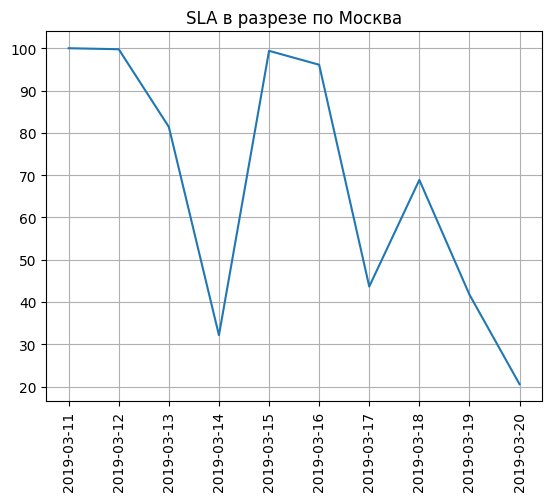

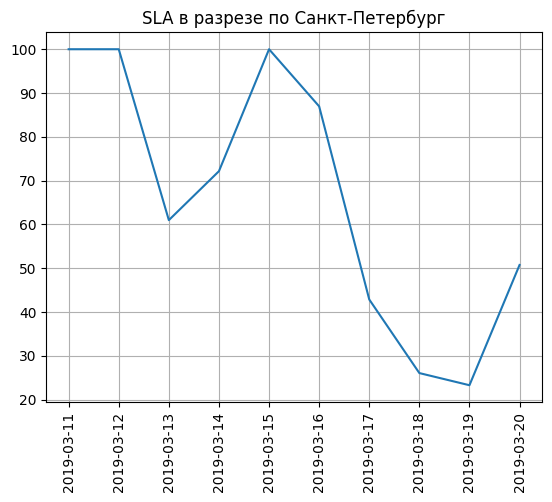

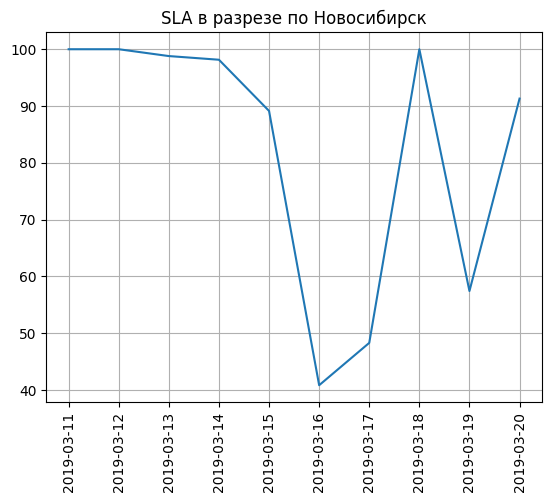

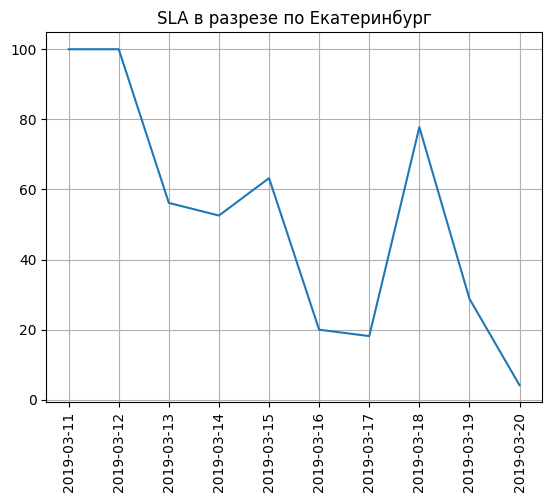

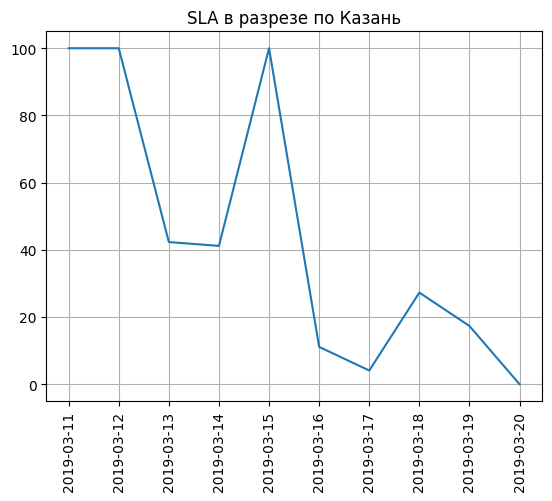

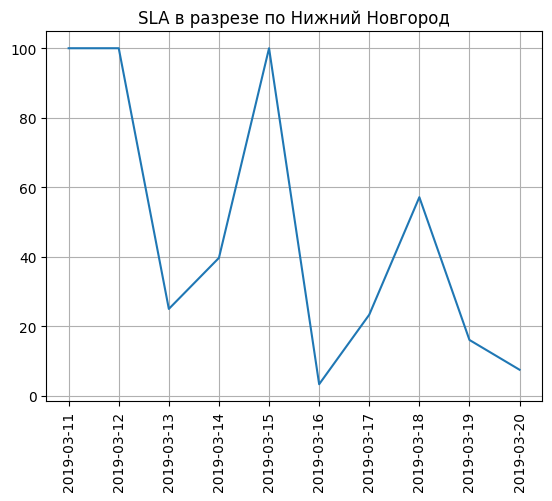

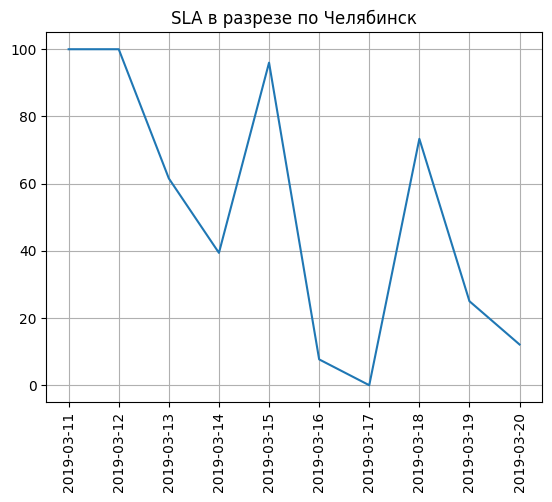

In [ ]:
for city_name in top_cities:
    df_q1_city_slice = df_q1[df_q1['Город'] == city_name]
    ax = [date[:10] for date in df_q1_city_slice['Дата']]

    plt.figure()
    plt.plot(ax, df_q1_city_slice['SLA'])
    plt.title(f'SLA в разрезе по {city_name}')
    plt.grid()
    plt.xticks(ax, rotation=90)

plt.show()

### Влияние факторов на SLA

- Промедление первого ответа на заявку более чем на час, и дальнейшие звонки по данной заявке. В случае первого промедления необходимо за наименьшее возможное количество звонков привести заявку к завершению.
- Время обращения, если клиент обратился в нерабочее время с каким интервалом ему ответят в колл-центре, точно сказать нельзя, а следовательно оценка работы служащих в колл-центре теряет полноту по данным случаям.

## Задание 2

### Запрос

In [ ]:
%%sql

SELECT t.'Город', t.'Дата', ROUND(CAST(SUM(
        t.success_flag
    ) AS REAL) / COUNT(*), 2) conversion
FROM (
    SELECT *, MAX(app_submit) OVER (PARTITION BY APPID) success_flag
    FROM (
        SELECT *, CASE WHEN l.RESULT like "%Заявка%заведена%" THEN 1 ELSE 0 END app_submit
        FROM logs l
            JOIN forms f
            on l.APPID = f.'Id заявка'
    )
) t
GROUP BY t.'Город', t.'Дата'

LIMIT 10;

 * sqlite:////content/test_database
Done.


Город,Дата,conversion
Ангарск,2019-03-13 00:00:00,0.0
Барнаул,2019-03-11 00:00:00,0.29
Барнаул,2019-03-12 00:00:00,0.59
Барнаул,2019-03-13 00:00:00,0.9
Барнаул,2019-03-14 00:00:00,0.65
Барнаул,2019-03-15 00:00:00,0.5
Барнаул,2019-03-16 00:00:00,0.8
Барнаул,2019-03-17 00:00:00,0.78
Барнаул,2019-03-18 00:00:00,1.0
Барнаул,2019-03-19 00:00:00,0.39


In [ ]:
df_q2 = pd.read_sql_query('''
    SELECT t.'Город', t.'Дата', ROUND(CAST(SUM(
        t.success_flag
    ) AS REAL) / COUNT(*), 2) conversion
    FROM (
        SELECT *, MAX(app_submit) OVER (PARTITION BY APPID) success_flag
        FROM (
            SELECT *, CASE WHEN l.RESULT like "%Заявка%заведена%" THEN 1 ELSE 0 END app_submit
            FROM logs l
                JOIN forms f
                on l.APPID = f.'Id заявка'
        )
    ) t
    GROUP BY t.'Город', t.'Дата'
''', con=conn)
df_q2

,Город,Дата,conversion
0,Ангарск,2019-03-13 00:00:00,0.00
1,Барнаул,2019-03-11 00:00:00,0.29
2,Барнаул,2019-03-12 00:00:00,0.59
3,Барнаул,2019-03-13 00:00:00,0.90
4,Барнаул,2019-03-14 00:00:00,0.65
...,...,...,...
298,Ярославль,2019-03-16 00:00:00,0.40
299,Ярославль,2019-03-17 00:00:00,0.09
300,Ярославль,2019-03-18 00:00:00,0.75
301,Ярославль,2019-03-19 00:00:00,0.52


### Визуализация

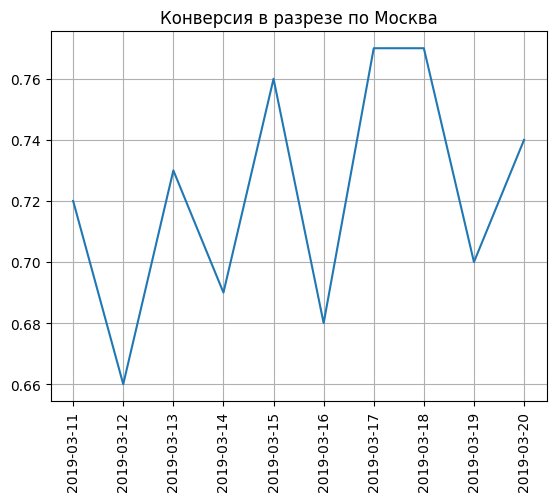

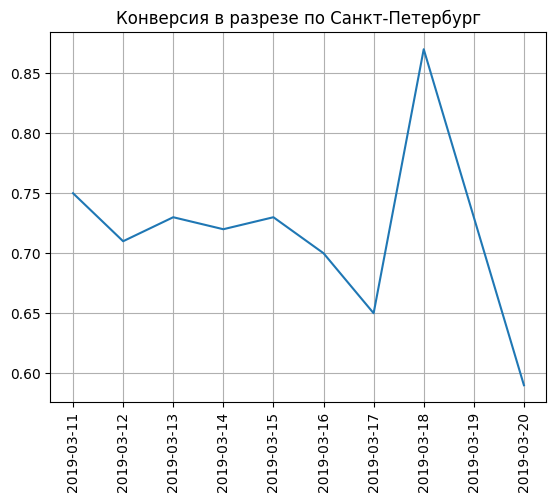

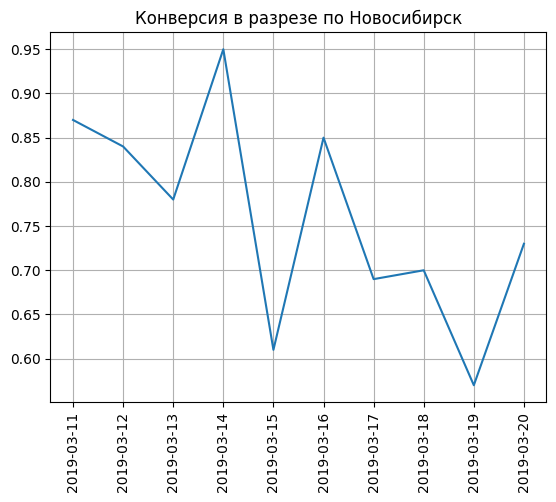

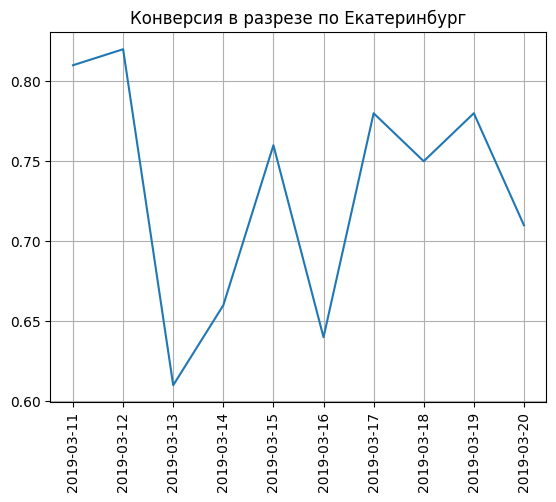

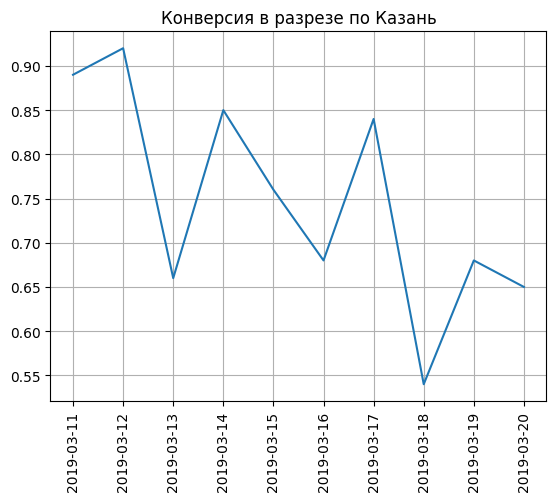

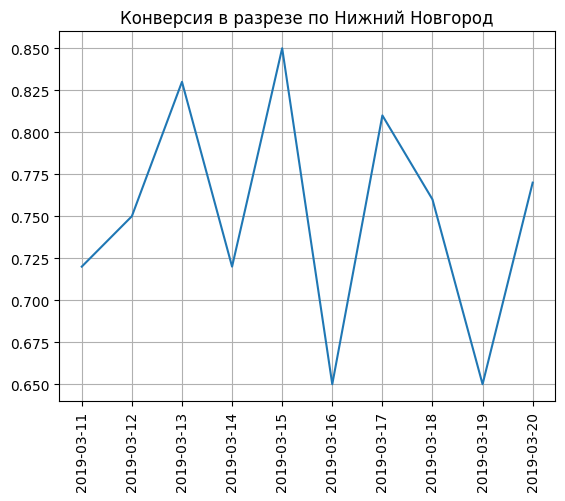

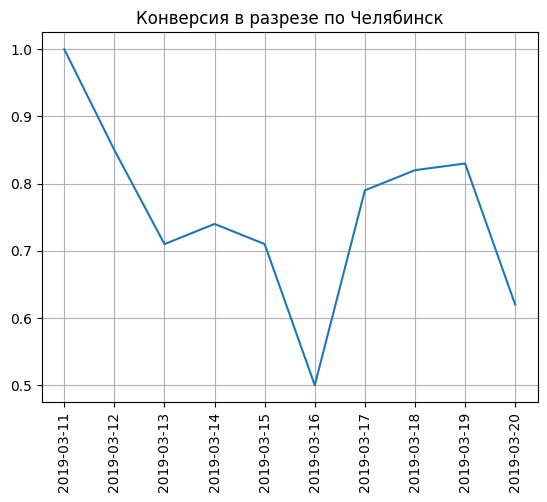

In [ ]:
for city_name in top_cities:
    df_q2_city_slice = df_q2[df_q2['Город'] == city_name]
    ax = [date[:10] for date in df_q2_city_slice['Дата']]

    plt.figure()
    plt.plot(ax, df_q2_city_slice['conversion'])
    plt.title(f'Конверсия в разрезе по {city_name}')
    plt.grid()
    plt.xticks(ax, rotation=90)

plt.show()

### Влияние факторов на конверсию

- Звонки по заявкам которые в итоге не будут заведены, в своей сути целевая задача не была выполнена, а время на звонки было потрачено.